In [1]:
__author__ = 'Kayli Glidic'

# Import Library

In [4]:
#import the module
from tshirt.pipeline import spec_pipeline

import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

#import yaml to read in the parameter file
import yaml

#imports to use RECTE
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time


#import to copy
from copy import deepcopy

#modeling light curves
from scipy.optimize import curve_fit
import batman

#to fix errors
import pdb

#to correct for time differences
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

from scipy.optimize import minimize
import time
from multiprocessing import Pool


Loading BokehJS ...

# CoRoT-1b Batch Processing the Spectroscopic Data

In [5]:
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)
    
bparamfile

{'procFiles': ['/fenrirdata1/es_tso/hst/visit01/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit02/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit03/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit04/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADextens

In [6]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml')

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


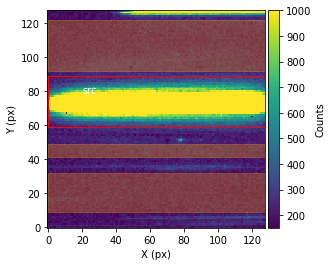

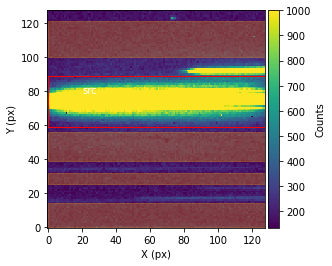

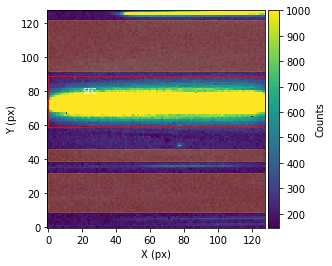

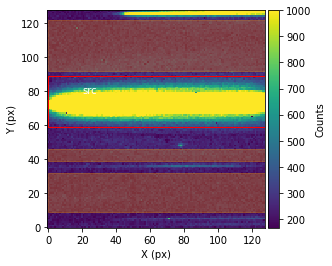

In [7]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True)

In [8]:
bspec.batch_run('do_extraction',useMultiprocessing=True)

Working on do_extraction for batch CoRoT-1 corot1_visit1 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit2 


On 0 of 98

On 15 of 98On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit3 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98


/home/kglidic/Software/tshirt/tshirt/pipeline/phot_pipeline.py:2409: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit4 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


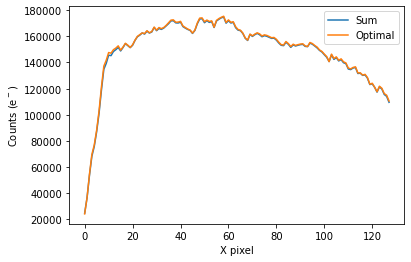

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


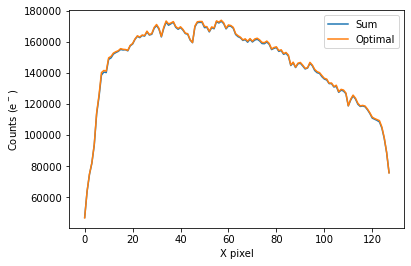

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


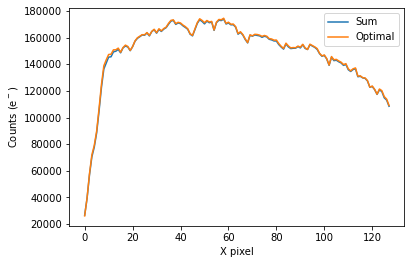

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


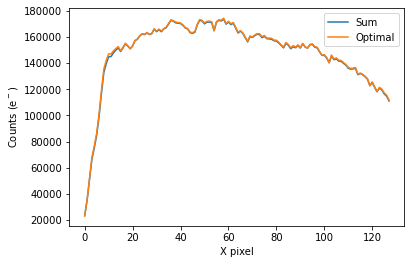

In [9]:
bspec.batch_run('plot_one_spec')

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


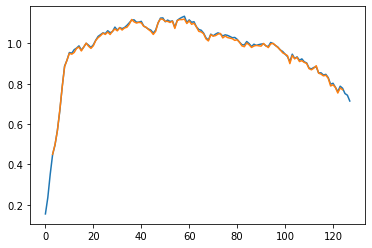

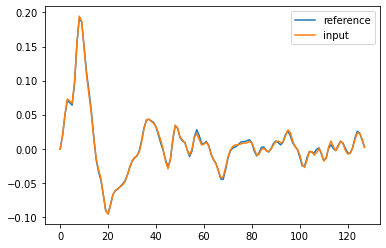

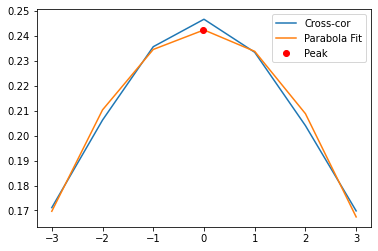

Shift = -0.023030966132883024, or index -0.023030966132882972


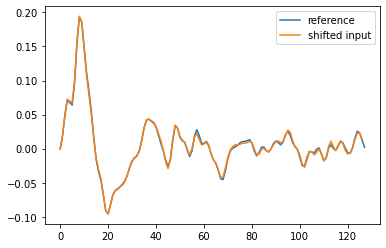

> /home/kglidic/Software/tshirt/tshirt/pipeline/spec_pipeline.py(1163)align_spec()
-> align2D[imgInd,:] = analysis.roll_pad(data2D[imgInd,:],offsetInd * self.param['specShiftMultiplier'])
(Pdb) q


BdbQuit: 

In [10]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=True)

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


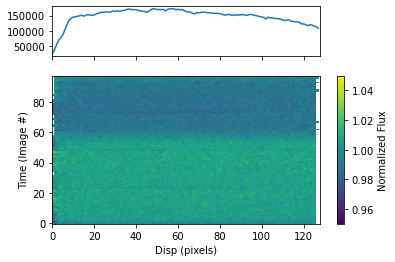

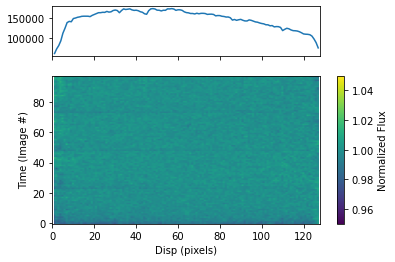

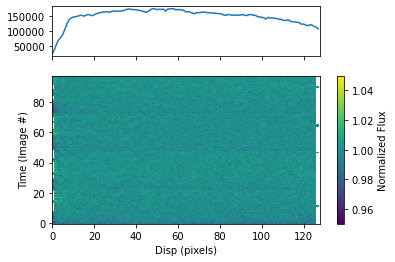

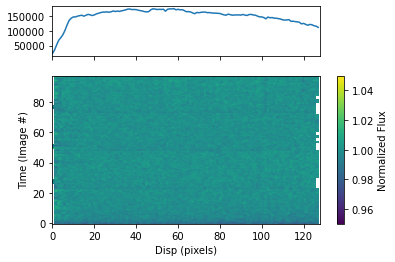

In [11]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=False)

In [12]:
bspec.batch_run('plot_wavebin_series', nbins=10, interactive=False,dispIndices=[10,118],savePlot=True)

Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


# Applying RECTE

In [14]:
#New way to import all the RECTE functions:
#from importlib import reload
#reload(Charge_Correction_Functions)

import Charge_Correction_Functions
from Charge_Correction_Functions import RECTE,RECTEMulti,calculate_correction, calculate_correction_fast, charge_correction

Loading BokehJS ...

## Organizing CoRoT-1b Data

In [15]:
#this convert all the data from the light curves into a table of values called result
result = bspec.batch_run('get_wavebin_series',nbins=10, recalculate=True)

Working on get_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit4 


### Reading in Vist Data 

In [16]:
#read in result files
corot1_visit1_results = pd.read_csv('corot1_visit1_results.csv')
corot1_visit2_results = pd.read_csv('corot1_visit2_results.csv')
corot1_visit3_results = pd.read_csv('corot1_visit3_results.csv')
corot1_visit4_results = pd.read_csv('corot1_visit4_results.csv')

#read in median fit files
median_image_v1 = fits.getdata('corot1_visit1_median_image.fits')
median_image_v2 = fits.getdata('corot1_visit2_median_image.fits')
median_image_v3 = fits.getdata('corot1_visit3_median_image.fits')
median_image_v4 = fits.getdata('corot1_visit4_median_image.fits')

### RECTE
CoRoT1-b Visit1

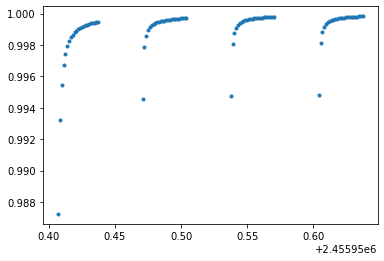

In [17]:
spec_v1 = bspec.return_spec_obj(ind=0)

ramps_v1=calculate_correction_fast(corot1_visit1_results['Time'].values,corot1_visit1_results['Exp Time'][0],median_image_v1,xList=np.arange(0, 128))

plt.plot(corot1_visit1_results['Time'].values, ramps_v1[30,:], '.')

correcteddata_v1, new_spec_v1 = charge_correction(spec_v1,ramps_v1)

In [18]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#new_spec.dyn_specFile()
#spec.dyn_specFile()

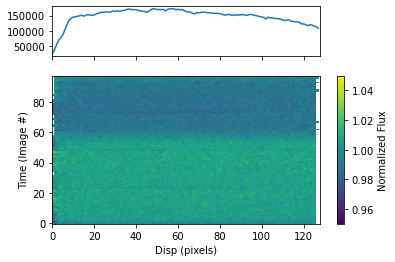

In [19]:
#checking the original dynamic spectrum 
spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

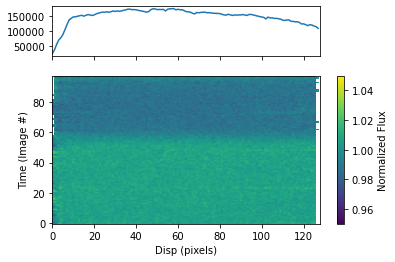

In [20]:
#checking the new dynamic spectrum 
new_spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

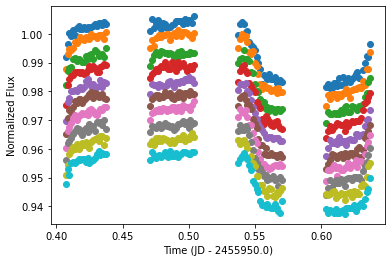

In [21]:
#original light curve
spec_v1.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
spec_v1.plot_wavebin_series(savePlot=False)

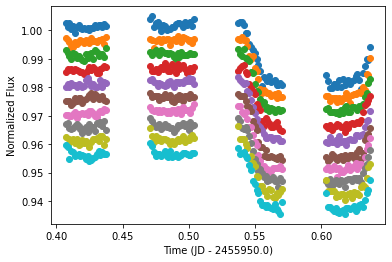

In [22]:
#new light curve
new_spec_v1.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
new_spec_v1.plot_wavebin_series(savePlot=False)

### RECTE
CoRoT1-b Visit2

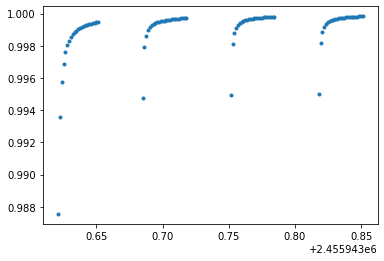

In [23]:
spec_v2 = bspec.return_spec_obj(ind=1)

ramps_v2=calculate_correction_fast(corot1_visit2_results['Time'].values,corot1_visit2_results['Exp Time'][0],median_image_v2,xList=np.arange(0, 128))

plt.plot(corot1_visit2_results['Time'].values, ramps_v2[30,:], '.')

correcteddata_v2, new_spec_v2 = charge_correction(spec_v2,ramps_v2)

In [24]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

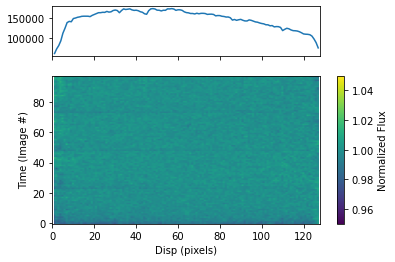

In [25]:
#checking the original dynamic spectrum 
spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

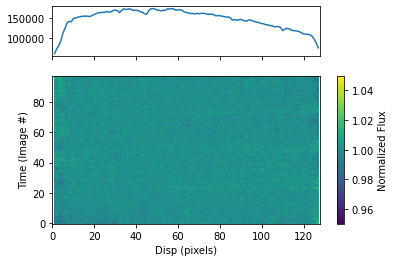

In [26]:
#checking the new dynamic spectrum 
new_spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

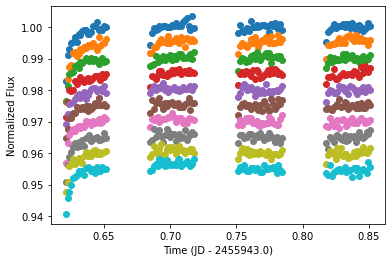

In [27]:
#original light curve
spec_v2.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
spec_v2.plot_wavebin_series(savePlot=False)

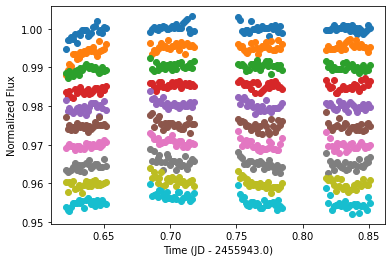

In [28]:
#new light curve
new_spec_v2.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
new_spec_v2.plot_wavebin_series(savePlot=False)

### RECTE
CoRoT1-b Visit3

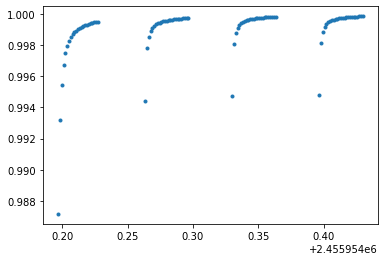

In [29]:
spec_v3 = bspec.return_spec_obj(ind=2)

ramps_v3=calculate_correction_fast(corot1_visit3_results['Time'].values,corot1_visit3_results['Exp Time'][0],median_image_v3,xList=np.arange(0, 128))

plt.plot(corot1_visit3_results['Time'].values, ramps_v3[30,:], '.')

correcteddata_v3, new_spec_v3 = charge_correction(spec_v3,ramps_v3)

In [30]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

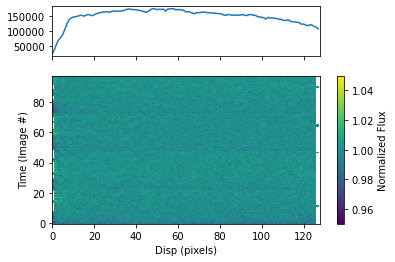

In [31]:
#checking the original dynamic spectrum 
spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

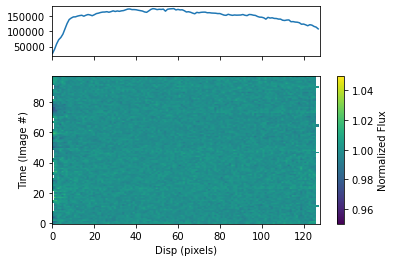

In [32]:
#checking the new dynamic spectrum 
new_spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

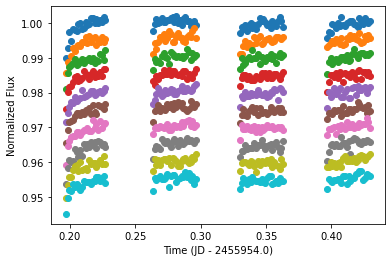

In [33]:
#original light curve
spec_v3.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
spec_v3.plot_wavebin_series(savePlot=False)

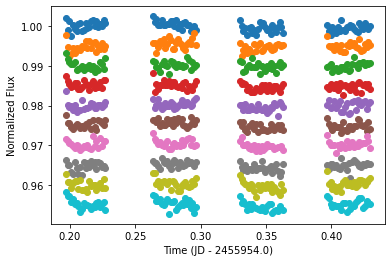

In [34]:
#new light curve
new_spec_v3.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
new_spec_v3.plot_wavebin_series(savePlot=False)

### RECTE
CoRoT1-b Visit4

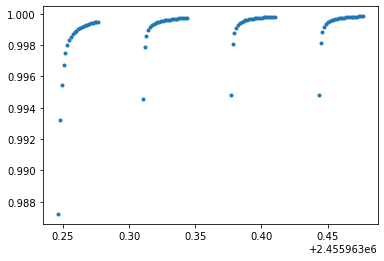

In [35]:
spec_v4 = bspec.return_spec_obj(ind=3)

ramps_v4=calculate_correction_fast(corot1_visit4_results['Time'].values,corot1_visit4_results['Exp Time'][0],median_image_v4,xList=np.arange(0, 128))

plt.plot(corot1_visit4_results['Time'].values, ramps_v4[30,:], '.')

correcteddata_v4, new_spec_v4 = charge_correction(spec_v4,ramps_v4)

In [36]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v4.dyn_specFile())
#print(spec_v4.dyn_specFile())

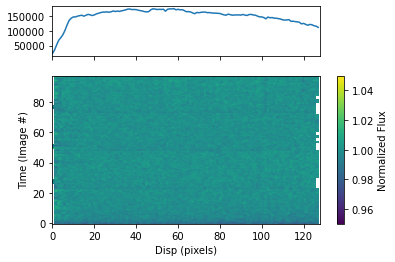

In [37]:
#checking the original dynamic spectrum 
spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

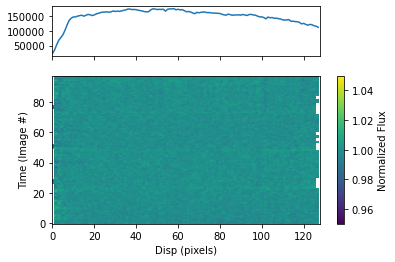

In [38]:
#checking the new dynamic spectrum 
new_spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

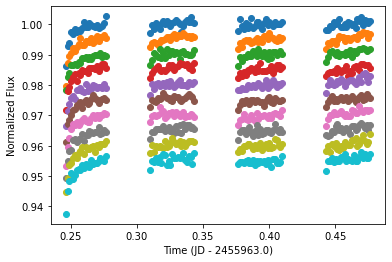

In [39]:
#original light curve
spec_v4.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
spec_v4.plot_wavebin_series(savePlot=False)

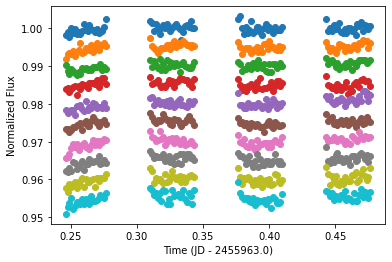

In [40]:
#new light curve
new_spec_v4.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10)
new_spec_v4.plot_wavebin_series(savePlot=False)

# Modeling Transit/Eclipses

In [41]:
#getting the values for planet radius and semi-major axis in units of stellar radii

#planet radius (in units of stellar radii)
rp =1.715 * u.Rjupiter #Bonomo et al. 2017
Rstar = 1.230 * u.Rsun #Bonomo et al. 2017
planet_radius = (rp/Rstar).si.value
#planet_radius = 0.1433 #Bean 2009

#semi-major axis (in units of stellar radii)
a = 0.02752 * u.au  #Bonomo et al. 2017
a_over_r = (a/Rstar).si.value
#a_over_r = 4.751 #Bean 2009

In [42]:
params_transit = batman.TransitParams()       #object to store transit parameters

params_transit.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_transit.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
#params_transit.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_transit.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_transit.inc =85.15 #Bonomo et al. 2017#83.88   #Bean 2009            #orbital inclination (in degrees)
params_transit.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_transit.w = 90.                                                      #longitude of periastron (in degrees)
params_transit.limb_dark = "nonlinear"                                      #limb darkening model
params_transit.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

def transit_model(x, rp, a, b):
    '''
    Models transit light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
    '''
    params_transit.rp = rp
    m = batman.TransitModel(params_transit, x)
    #Modifying the slope: Julian Date - Initial Julian Date 
    x0 = np.min(x)
    flux = m.light_curve(params_transit)*(a+b*(x-x0))
    return flux

In [43]:
#one must define the global parameters im, exptime, and xList for each visit
def transit_model_RECTE(x, rp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models transit light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
        
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dtrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    
    dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = transit_model(x,rp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified

In [44]:
params_eclipse = batman.TransitParams()       #object to store transit parameters

params_eclipse.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_eclipse.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
params_eclipse.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_eclipse.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_eclipse.inc =85.10   #Bonomo et al. 2017        #orbital inclination (in degrees)
params_eclipse.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_eclipse.w = 90.                                                      #longitude of periastron (in degrees)
params_eclipse.limb_dark = "nonlinear"                                      #limb darkening model
params_eclipse.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

#parameters for modeling eclipses 
#specify the planet-to-star flux ratio and the central eclipse time:
params_eclipse.t_secondary = params_eclipse.t0 + 0.5* 1.5089682

#adding a new parameter b for new normalization (a+b*x)
def eclipse_model(x, fp, a, b):
    '''
    Models eclipse light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in days 
        
    fp: int
        planet-to-star flux ratio
        
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    '''
    params_eclipse.fp = fp/1000000
    m = batman.TransitModel(params_eclipse, x, transittype="secondary")
    #Modifying the slope: Julian Date - Initial Julian Date 
    x0 = np.min(x)
    flux = m.light_curve(params_eclipse)*(a+b*(x-x0)) 
    return flux

In [45]:
#one must define the global parameters im, exptime, and xList for each visit
def eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models eclipse light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in days 
    fp: int
        Planet-to-flux ratio
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
    
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
     dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = eclipse_model(x,fp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified
    

In [48]:
# if you needed to define an object spec 
#relPath = '/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_batch_file.yaml'
#specPath = os.path.join(spec_pipeline.baseDir,relPath)
#spec = spec_pipeline.batch_spec(specPath)

def barycenter_correction(self):
    t1, t2 = self.get_wavebin_series()
    head = fits.getheader(self.fileL[0])
    #print("Time from tshirt: {}".format(t1['Time'][0]))
    
    expStartJD = head['EXPSTART'] + 2400000.5
    #print("Time from EXPSTART keyword {}".format(expStartJD))
    
    t1 = Time(t1['Time'][0],format='jd')
    coord = SkyCoord('06 48 19.1724141241 -03 06 07.710423478',unit=(u.hourangle,u.deg))
    loc = EarthLocation.of_site('keck')
    diff = t1.light_travel_time(coord,location=loc)
    #print('Travel Time from Keck to Barycenter= {} min'.format((diff / u.min).si))
    
    return (diff / u.day).si


In [49]:
def optimize_batman_model(self,model,nbins=10,showPlot=False):
    '''
    Optimizes models of transit/eclipse light curve based on initial parameters
    
    Parameters
    ----------
    nbins: int
        The number of wavelength bins
    showPlot: bool
        Make the plot visible?
        
    '''
   
    
    results = self.get_wavebin_series(nbins=nbins)
    corrected_results = results[0].to_pandas()
    corrected_results_errors = results[1].to_pandas()
    
    columns = corrected_results.columns
    columns_errors = corrected_results_errors.columns
    
    #barycenter time correction in days 
    time_correction = barycenter_correction(self)
    
    ydata = corrected_results.columns[1:].values
    xdata = corrected_results['Time'].values+time_correction #days correction for Solar barycenter
    ydata_errors = corrected_results_errors.columns[1:].values
    
    popt_list=[]
    pcov_list=[]
    
    if(model==transit_model):
        text = 'fit: pr=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [0.13,1.0,0.0]
    elif(model ==eclipse_model):
        text = 'fit: fp=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [500,1.0,0.0]
    else: 
        print("invalid")
        
    for columns, columns_errors in zip(ydata,ydata_errors):
        #excluding the first orbit since RECTE not optimized here
        xdata_trimmed = xdata[23:]
        ydata_trimmed = corrected_results[columns][23:]
        ydata_error_trimmed = corrected_results_errors[columns_errors][23:].tolist()

        popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed, sigma=ydata_error_trimmed,p0=p0)

        popt_list.append(popt[0])
        pcov_list.append(np.sqrt(np.diag(pcov)))
        yerr = [row[0] for row in pcov_list]
        
        if(showPlot==True):
            fig, ax =plt.subplots()

            #plotting all four orbits but, the model excludes the first orbit

            ax.plot(xdata, model(xdata, *popt), 'r-',
                    label=text % tuple(popt))

            ax.plot(corrected_results['Time'], corrected_results[columns],'o')
            ax.set_xlabel('Time (JD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Wavebin '+ columns)

    return popt_list,yerr

In [50]:
def optimize_batman_model_RECTE(self,model,nbins=10,showPlot=False, recalculate=False):
    '''
    Optimize Light curves with RECTE charge trapping correction
    
    Parameters
    ----------
    model: function
        The function that models either transits or eclipses. Must be previously defined
        
    nbins: int
        The number of wavelength bins 
        
    showPlot: bool
            Make the plot visible? 
        '''
    global xList
    
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    columns = raw_results.columns
    columns_errors = raw_results_errors.columns
    
    #barycenter time correction in days 
    time_correction = barycenter_correction(self)
    
    ydata = raw_results.columns[1:].values
    xdata = raw_results['Time'].values+time_correction #days correction for Solar barycenter
    ydata_errors = raw_results_errors.columns[1:].values
     
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas()
    
    wavelength = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
    
    if(showPlot==True):
        fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(20,10),sharey=False)
    
    xList_all = []
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind]
        Disp_end = table_noise['Disp End'][ind]
        Disp_xList = np.arange(Disp_st, Disp_end,1)
        xList_all.append(Disp_xList)
    
    popt_list=[]
    pcov_list=[]
    

    if(model==transit_model_RECTE):
        text = 'fit: pr=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [0.13,1.0,0.0,200,200,20,1]
    elif(model ==eclipse_model_RECTE):
        text = 'fit: fp=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [500,1.0,0.0,200,200,20,1]
    
    else: 
        print("invalid")
        
    color_idx = np.linspace(0.3, 0.8, nbins)

    for columns, columns_errors,i,j,k,l in zip(ydata,ydata_errors,xList_all,np.arange(nbins),color_idx,wavelength):
        xList = i

        xdata_trimmed = xdata
        ydata_trimmed = raw_results[columns]
        ydata_error_trimmed = raw_results_errors[columns_errors].tolist()
        
        
        #results_file = 'opt_result_tables/new_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        results_file = 'opt_result_tables/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

        if (os.path.exists(results_file) == True ) and (recalculate == False):
            dat = ascii.read(results_file)
            popt = np.array(dat['popt'])
            pcov_diag = np.array(dat['pcov_diag'])
              
        else:
            bounds =([-np.inf,0,-np.inf,0,0,0,0],[np.inf,np.inf,np.inf,500,500,200,200])
            popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed, sigma=ydata_error_trimmed,p0=p0,bounds=bounds)
            pcov_diag = np.sqrt(np.diag(pcov))
            dat = Table()
            dat['popt'] = popt
            dat['pcov_diag'] = pcov_diag
            dat.write(results_file)


        popt_list.append(popt)
        pcov_list.append(pcov_diag)
        #yerr = [row[0] for row in pcov_list]
        
        if(showPlot==True):

            
            #lightcurve_file = 'model_lightcurves/new_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
            lightcurve_file = 'model_lightcurves/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

            if (os.path.exists(lightcurve_file) == True ) and (recalculate == False):
                dat = ascii.read(lightcurve_file)
                Time = np.array(dat['Time'])

                if np.allclose(Time,xdata,rtol=1e-15) == False:
                    raise Exception("times don't match")
                ymodel = np.array(dat['ymodel'])
                ramp_model = np.array(dat['ramp_model'])
            else: 
                ymodel =model(xdata, *popt)
                ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=popt[3], dTrap_s=[popt[4]], trap_pop_f=popt[5], dTrap_f=[popt[6]])
                ramp_model = np.mean(ramp,axis=0)
                dat = Table()
                dat['Time'] = xdata
                dat['ymodel'] = ymodel
                dat['ramp_model'] = ramp_model
                dat.write(lightcurve_file)
                

            #plotting all four orbits : first plot is the model with RECTE, 2nd plot is the data with the systematic removed.
            offset = 0.007
            
            ax.plot(xdata, ymodel-j*offset, 'r-',
                    label=text % tuple(popt))
            ax.plot(xdata, raw_results[columns]-j*offset,'o',color=plt.cm.gist_heat(k),alpha=0.8)
            ax.set_xlabel('Time (BJD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Raw Uncorrected Light Curves')
            #ax.legend()
            ax.annotate("{:.2f}".format(l), xy =(np.mean(xdata_trimmed)-0.1, np.mean(ydata_trimmed)-j*offset+0.004),fontsize=15,weight='bold',color=plt.cm.gist_heat(k))
            
            ax2.plot(xdata,(raw_results[columns]/ramp_model)-j*offset,'o',color=plt.cm.gist_heat(k),alpha=0.8)
            ax2.plot(xdata, (ymodel/ramp_model)-j*offset, 'r-',
                    label=text % tuple(popt))
            #ax2.set_ylabel('Normalized Flux')
            ax2.set_xlabel('Time (BJD)')
            ax2.set_title('RECTE Corrected Light Curves')
            ax2.annotate("{:.2f}".format(l), xy =(np.mean(xdata_trimmed)-0.1, np.mean(ydata_trimmed)-j*offset+0.004),fontsize=15,weight='bold')


            #ax2.legend()
            
            ax3.plot(xdata, (raw_results[columns]-ymodel)-j*offset,'o',color=plt.cm.gist_heat(k))
            ax3.set_ylabel('Residuals')
            ax3.set_xlabel('Time (BJD)')
            ax3.set_title('Residuals')
            #ax3.annotate(columns, xy =(np.mean(xdata_trimmed)+0.05, np.mean(ydata_trimmed)-j*offset))
        
        
        #figure_name='saved_figures/new_Corot1_{}_lightcurves.pdf'.format(self.param['nightName'])   
        #fig.savefig(figure_name)

    return popt_list,pcov_list

## Transit (Visit 1)

Runtime of the program is 79.12232875823975


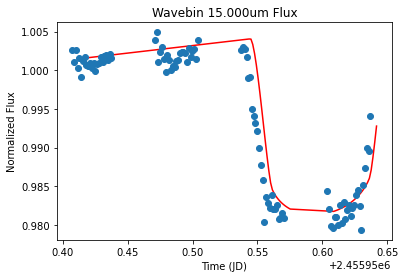

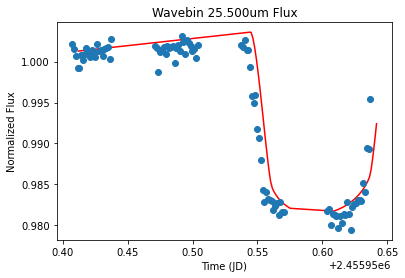

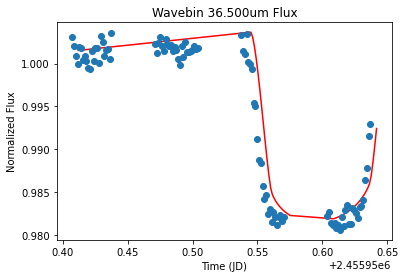

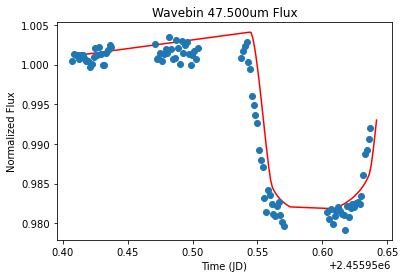

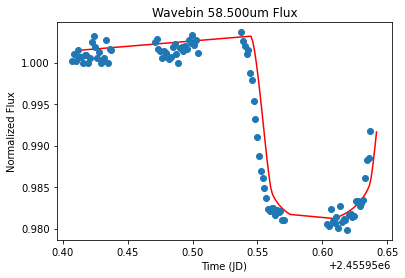

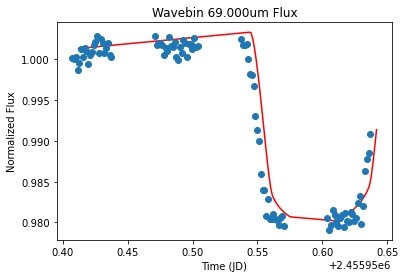

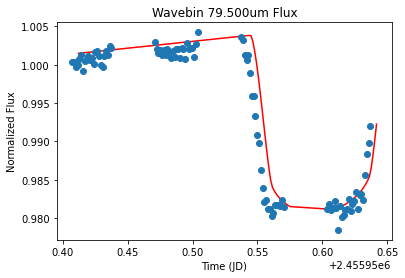

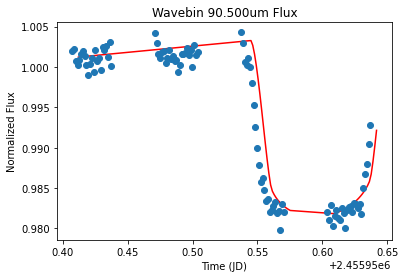

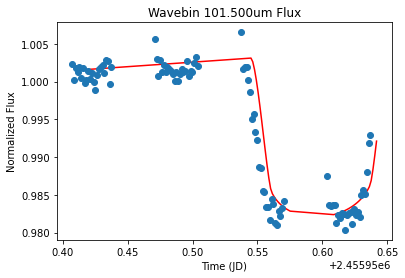

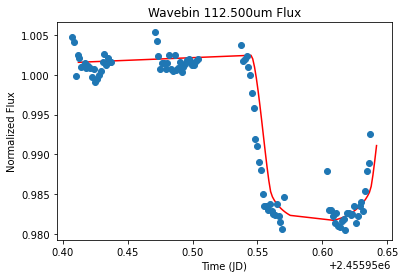

In [51]:
import time
start = time.time()
#optimizing/plotting visit 1 wavebin channels 
v1_wavebins=optimize_batman_model(new_spec_v1,transit_model,nbins=10,showPlot=True)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 333.98233366012573


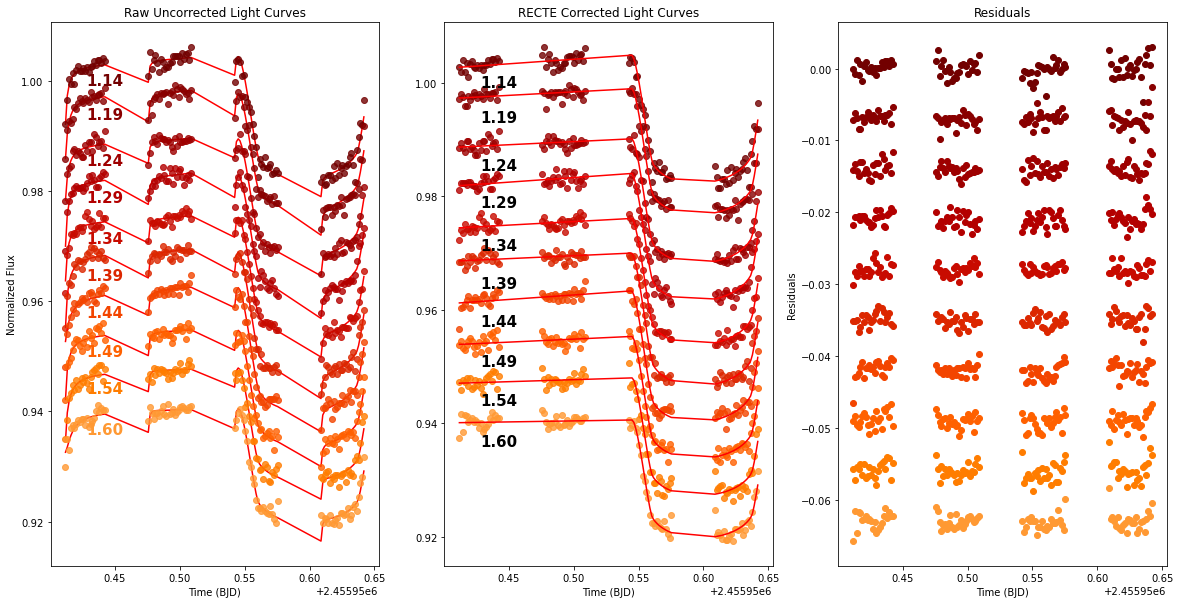

In [52]:
import time
start = time.time()

#optimizing/plotting visit 1 wavebin channels with RECTE
info_v1 = corot1_visit1_results
exptime = info_v1['Exp Time'][0]
im = fits.getdata('corot1_visit1_median_image.fits')

v1_wavebin_channels = optimize_batman_model_RECTE(spec_v1,transit_model_RECTE,nbins=10,showPlot=True)
end = time.time()

print(f"Runtime of the program is {end - start}")

In [53]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


## Secondary Eclipses (Visit 2, 3, & 4)

### Visit 2

Runtime of the program is 59.53868222236633


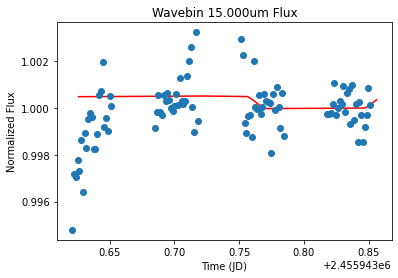

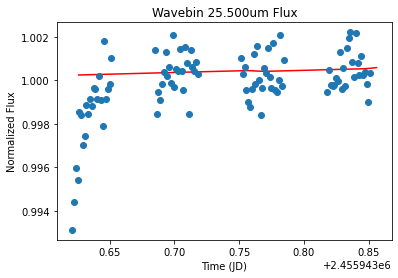

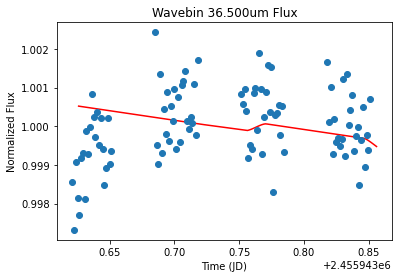

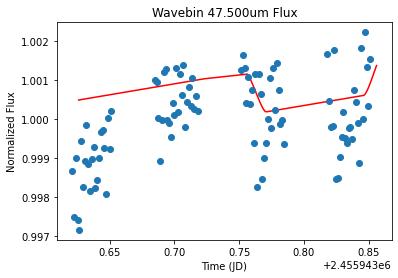

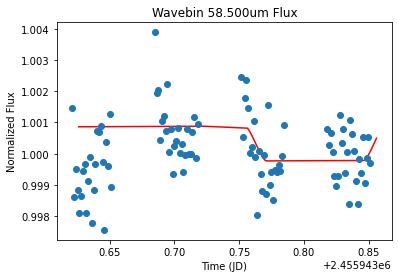

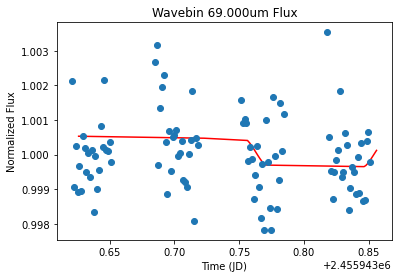

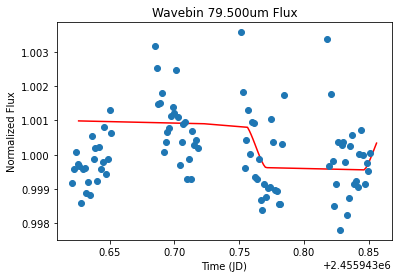

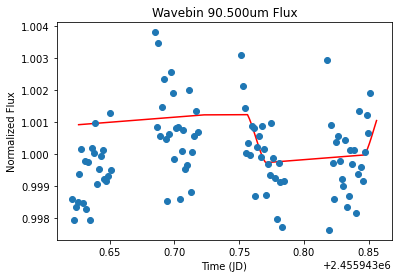

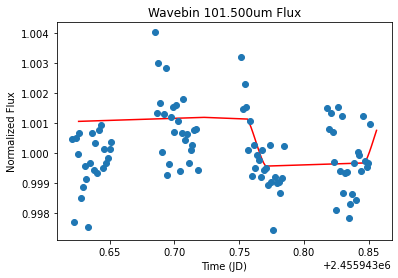

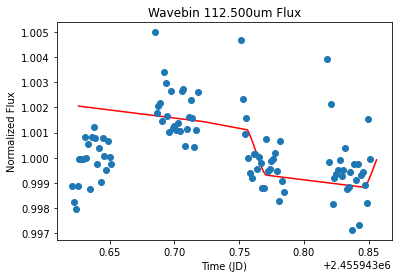

In [54]:
start = time.time()
#optimizing/plotting visit 2 wavebin channels 
v2_wavebins=optimize_batman_model(new_spec_v2,eclipse_model,nbins=10,showPlot=True)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 283.2771999835968


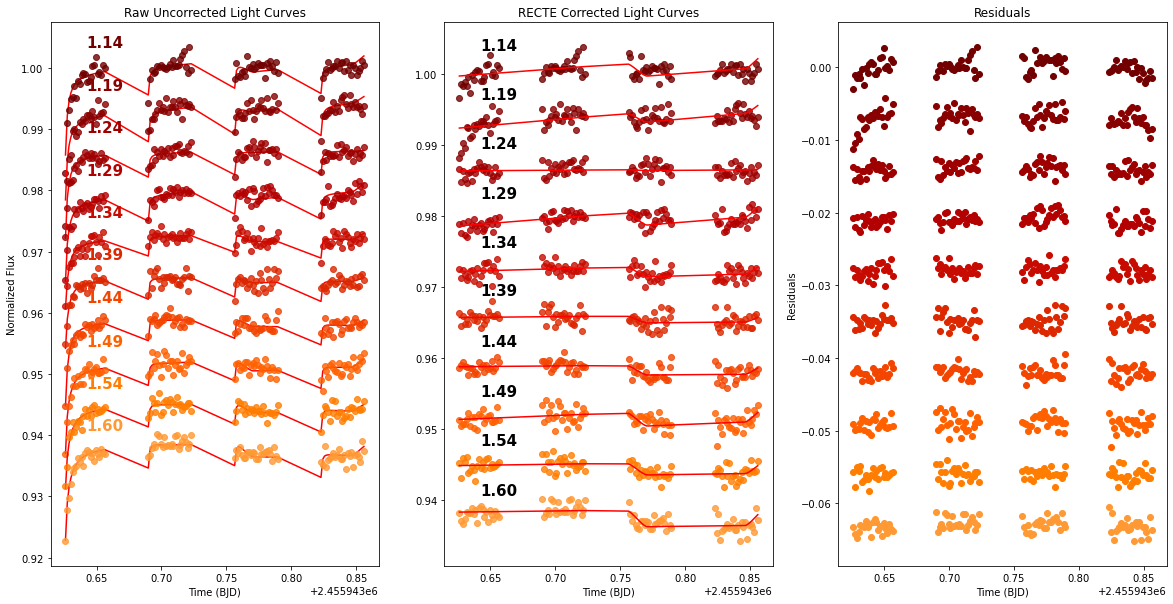

In [55]:
import time
start = time.time()

#optimizing/plotting visit 2 wavebin channels with RECTE
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = fits.getdata('corot1_visit2_median_image.fits')

v2_wavebin_channels = optimize_batman_model_RECTE(spec_v2,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [56]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


###  Visit 3

Runtime of the program is 57.885292291641235


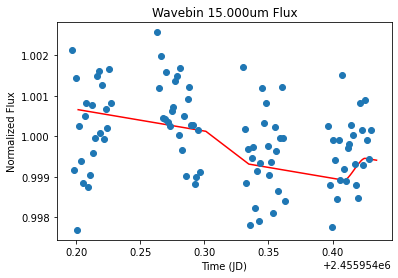

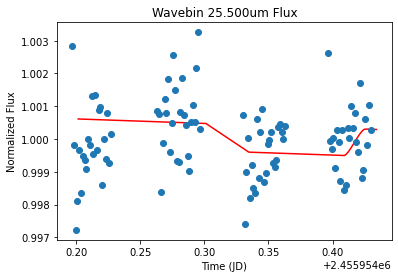

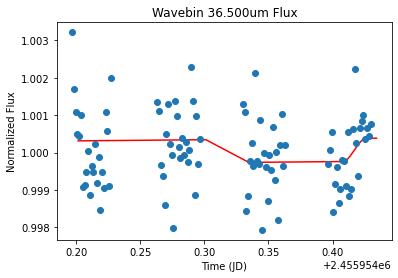

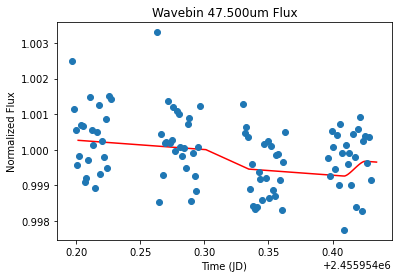

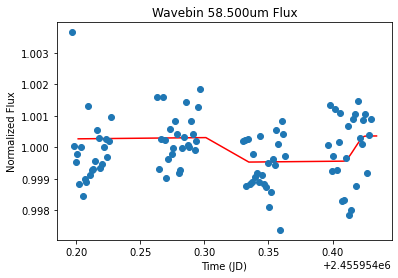

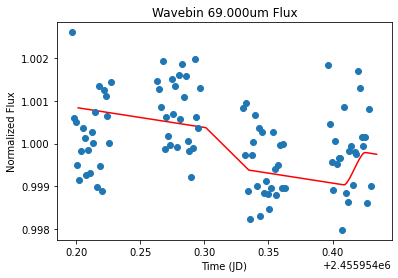

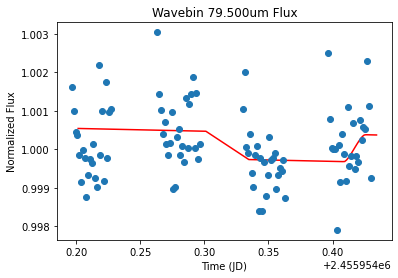

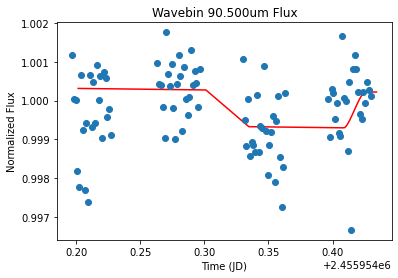

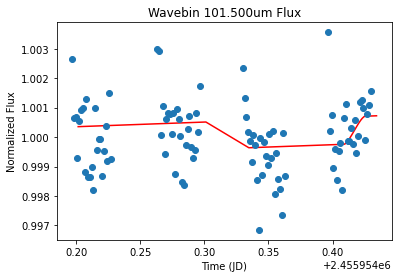

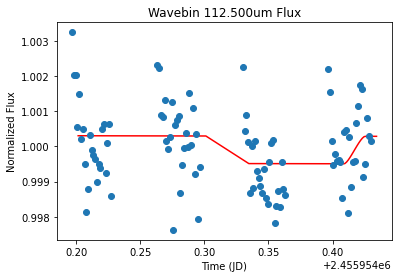

In [57]:
start = time.time()
#optimizing/plotting visit 3 wavebin channels 
v3_wavebins=optimize_batman_model(new_spec_v3,eclipse_model,nbins=10,showPlot=True)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 274.4377303123474


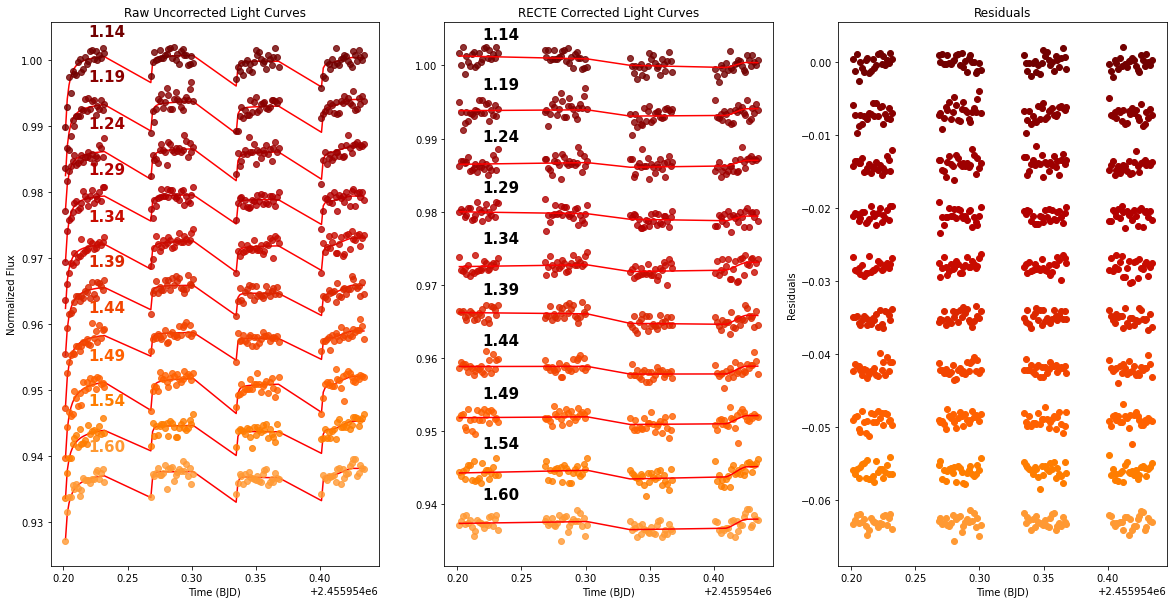

In [58]:
start = time.time()

#optimizing/plotting visit 3 wavebin channels with RECTE
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = fits.getdata('corot1_visit3_median_image.fits')

v3_wavebin_channels = optimize_batman_model_RECTE(spec_v3,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [59]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


###  Visit 4

In [60]:
start = time.time()

#optimizing/plotting visit 4 wavebin channels 
v4_wavebins=optimize_batman_model(new_spec_v4,eclipse_model,nbins=10)

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 56.606048345565796


Runtime of the program is 303.5413589477539


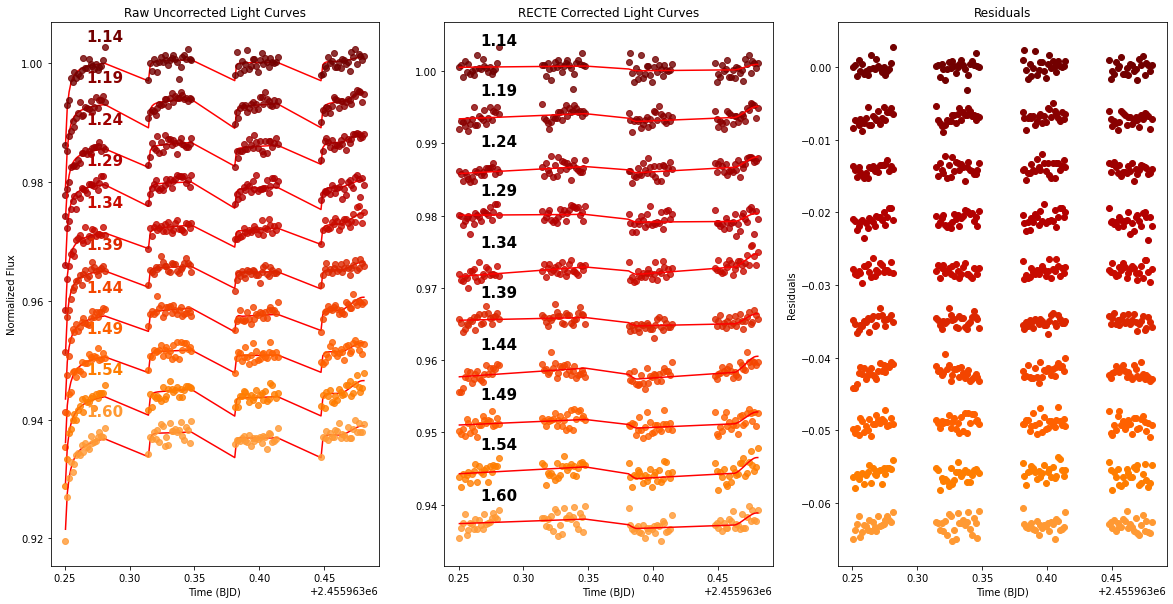

In [61]:
start = time.time()

#optimizing/plotting visit 4 wavebin channels with RECTE
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = fits.getdata('corot1_visit4_median_image.fits')

v4_wavebin_channels = optimize_batman_model_RECTE(spec_v4,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [62]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


# MCMC Functions

In [68]:
def log_likelihood(theta, x, y, yerr):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta
    model = eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f)
    return -0.5 * np.sum((y - model) ** 2 / yerr ** 2)

In [69]:
def log_prior(theta):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta
    if 0.0 < trap_pop_s < 500 and 0.0 < dtrap_s < 500 and 0.0 < trap_pop_f < 200 and 0.0 < dtrap_f < 200 :
        return 0.0
    return -np.inf

In [70]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if np.isfinite(lp):
        return lp + log_likelihood(theta, x, y, yerr)
    return -np.inf

In [88]:
def MCMC(self,model,curvefit_channel,iterations,nbins=10,recalculate=False,showPlot=False):
    
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    columns = raw_results.columns
    print(len(columns))
    columns_errors = raw_results_errors.columns
    
    #barycenter time correction in days 
    time_correction = barycenter_correction(self)
    
    ydata = raw_results.columns[1:].values
    xdata = raw_results['Time'].values+time_correction #days correction for Solar barycenter
    ydata_errors = raw_results_errors.columns[1:].values
    
    #read in optimized error array and average each parameter for each wavebin for each visit
    error_2D = np.array(curvefit_channel[1])
    bad_points = np.isfinite(error_2D) == False
    error_2D[bad_points] = np.nan
    avg_error=np.nanmean(error_2D, axis=0)
    
    if(model==transit_model_RECTE):
        labels = ["pr", "a", "b","trap_pop_s","dtrap_s", "trap_pop_f", "dtrap_f"]
        p0 = [0.13,1.0,0.0,200,100,20,1]
    elif(model ==eclipse_model_RECTE):
        labels = ["fp", "a", "b","trap_pop_s","dtrap_s","trap_pop_f", "dtrap_f"]
        p0 = [500,1.0,0.0,200,100,20,1]
    
    else: 
        print("invalid")
    

    for columns, columns_errors in zip(ydata,ydata_errors):

        ydata_trimmed = raw_results[columns].values
        ydata_errors_trimmed = raw_results_errors[columns_errors].values

        start_2 = time.time()

        result_file = 'opt_result_tables/MCMC20000_soln.x_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        if (os.path.exists(result_file) == True):
            dat = ascii.read(result_file)
            soln_xarray = dat['soln']
        else:
            dat = Table()
            #run MCMC
            nll = lambda *args: -log_probability(*args)
            initial = np.array([p0[0],p0[1], p0[2], p0[3],p0[4],p0[5],p0[6]])
            soln = minimize(nll, initial, args=(xdata, ydata_trimmed, ydata_errors_trimmed))
            soln_xarray = soln.x
            dat['soln'] = soln['x']
            dat.write(result_file)
        end_2 = time.time()
        innertime= end_2-start_2
        print("Solution_x took {0:.1f} seconds".format(innertime))


        nwalkers = 14
        ndim = 7
        sampler_array = []

        pos = np.empty([nwalkers,ndim])
        for i, j, k in zip(avg_error,soln_xarray,np.arange(ndim)):
            if k == 3 or k == 4:
                pos[:,k] = np.random.rand(nwalkers) * 500
            elif k ==5 or k==6:
                pos[:,k] = np.random.rand(nwalkers) * 200
            else: 
                pos[:,k] = j + i* np.random.randn(nwalkers)*10            

        filename = '/fenrirdata1/kg_data/sample_chains20000/MCMC20000_visits_{}_wavelength_ind_{}_nbins{}.h5'.format(self.param['nightName'],columns,nbins)
        
        if (os.path.exists(filename) == True) and (recalculate == False):
            sampler = emcee.backends.HDFBackend(filename, read_only=True)
            check_size = sampler.get_chain()
            print("found"+str(check_size.shape[0])) 
            if (check_size.shape[0] < iterations):
                print("running"+str(check_size.shape[0]))
                with Pool(16) as pool:
                    new_backend = emcee.backends.HDFBackend(filename)
                    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata_trimmed, ydata_errors_trimmed), backend=new_backend, pool=pool)
                    sampler.run_mcmc(None, iterations-check_size.shape[0], progress=True, store =True)
                    
                    #print("Final size: {0}".format(new_backend.iteration))
                    #sampler = emcee.EnsembleSampler(nwalkers, ndim,log_probability, args=(xdata, ydata_trimmed, ydata_errors_trimmed), backend=run2_backend, pool=pool)
                    #sampler.run_mcmc(pos, iterations-samples.shape[0], progress=True, store =True);


        else:
            with Pool(16) as pool:
                start = time.time()

                backend = emcee.backends.HDFBackend(filename)
                #backend.reset(nwalkers, ndim)

                # Initialize the sampler
                sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata_trimmed, ydata_errors_trimmed),backend=backend,pool=pool)
                sampler.run_mcmc(pos, iterations, progress=True,store=True);
                

                end = time.time()
                multi_time = end - start
            print("Multiprocessing took {0:.1f} seconds".format(multi_time))
        
        sampler_array.append(sampler)


        if(showPlot==True):
            fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True)
            
            samples = sampler.get_chain()


            for k in range(ndim):
                ax = axes[k]
                ax.plot(samples[:, :, k], "k", alpha=0.3)
                ax.set_xlim(0, len(samples))
                ax.set_ylabel(labels[k])
                ax.yaxis.set_label_coords(-0.1, 0.5)
            axes[-1].set_xlabel("step number");



    return sampler_array

11
Solution_x took 0.0 seconds


100%|██████████| 5000/5000 [1:49:55<00:00,  1.32s/it]


Multiprocessing took 6596.4 seconds
Solution_x took 82.0 seconds


100%|██████████| 5000/5000 [1:49:57<00:00,  1.32s/it]


Multiprocessing took 6598.7 seconds
Solution_x took 145.4 seconds


100%|██████████| 5000/5000 [1:50:42<00:00,  1.33s/it]


Multiprocessing took 6643.4 seconds
Solution_x took 220.7 seconds


100%|██████████| 5000/5000 [1:50:32<00:00,  1.33s/it]


Multiprocessing took 6633.0 seconds
Solution_x took 236.3 seconds


100%|██████████| 5000/5000 [1:51:22<00:00,  1.34s/it]


Multiprocessing took 6683.1 seconds
Solution_x took 777.0 seconds


100%|██████████| 5000/5000 [1:51:10<00:00,  1.33s/it]


Multiprocessing took 6671.2 seconds
Solution_x took 135.2 seconds


100%|██████████| 5000/5000 [1:51:02<00:00,  1.33s/it]


Multiprocessing took 6663.6 seconds
Solution_x took 98.6 seconds


100%|██████████| 5000/5000 [1:51:04<00:00,  1.33s/it]


Multiprocessing took 6665.6 seconds
Solution_x took 148.3 seconds


100%|██████████| 5000/5000 [1:51:20<00:00,  1.34s/it]


Multiprocessing took 6681.6 seconds
Solution_x took 106.5 seconds


100%|██████████| 5000/5000 [1:50:37<00:00,  1.33s/it]


Multiprocessing took 6638.1 seconds
Runtime of the program is 68432.58806061745 seconds


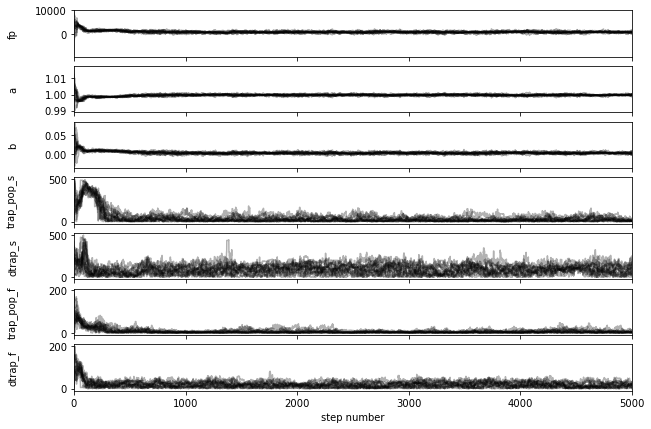

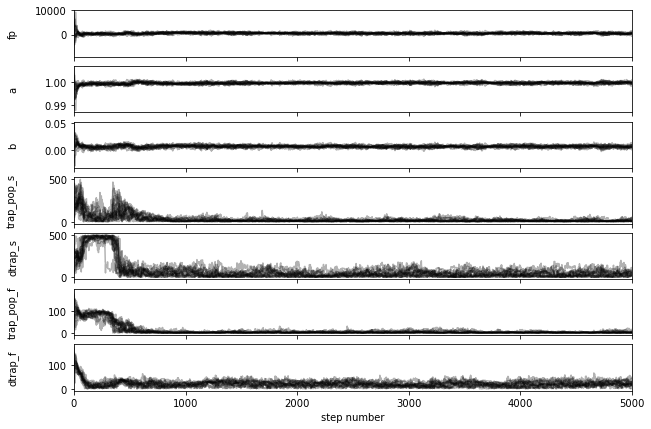

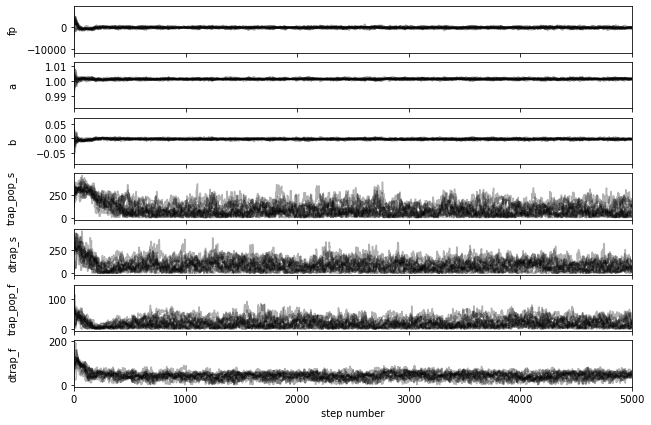

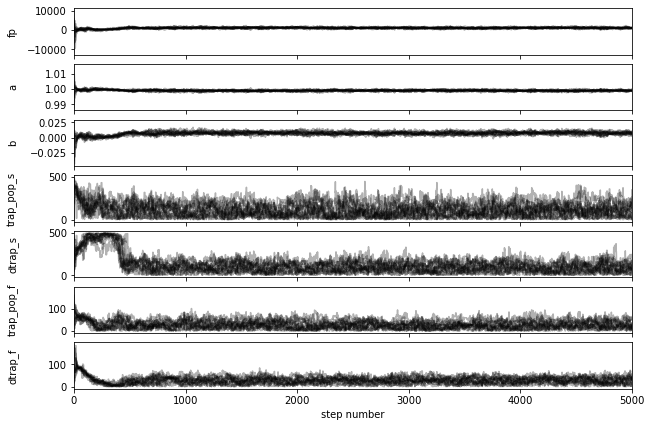

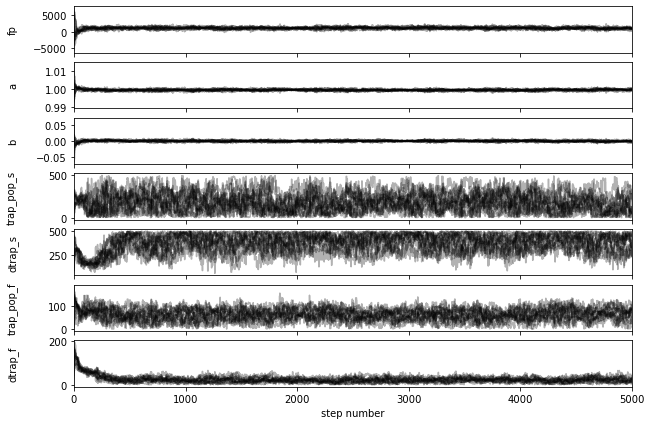

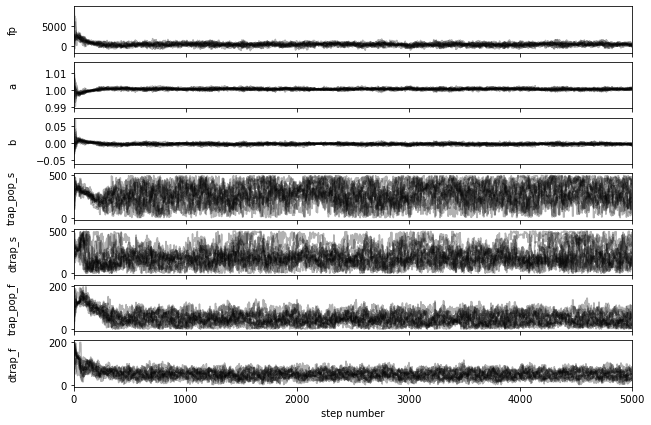

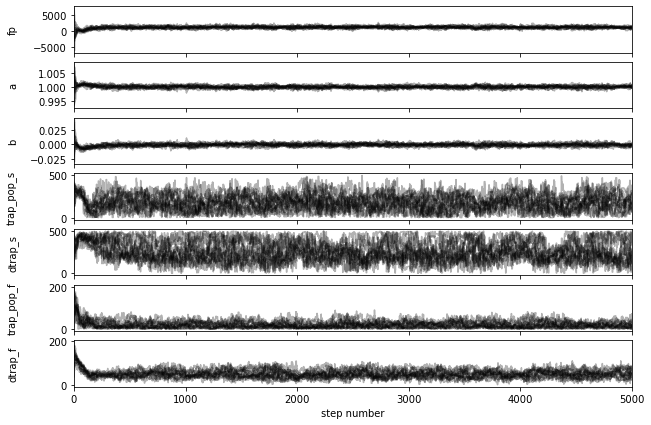

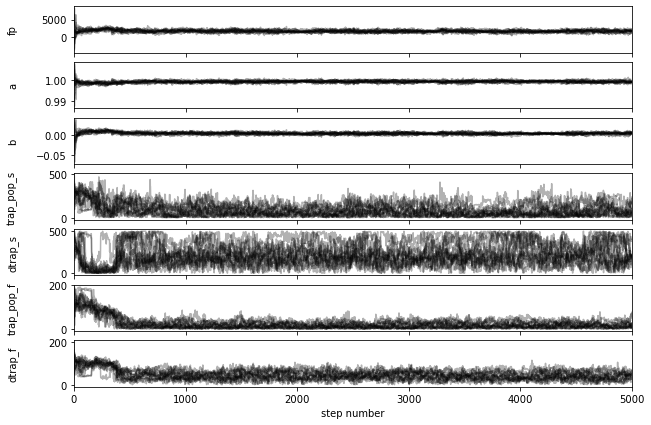

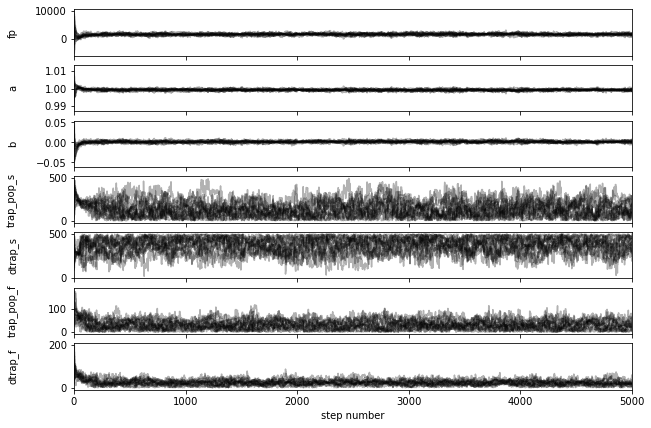

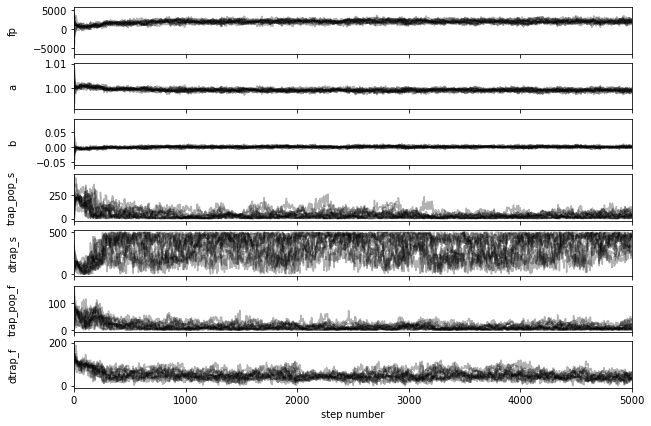

In [89]:
import emcee
start = time.time()
sampler_2 = MCMC(spec_v2,eclipse_model_RECTE,v2_wavebin_channels,5000,nbins=10,recalculate=False,showPlot=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Solution_x took 0.0 seconds
found20000
Solution_x took 0.0 seconds
found20000
Solution_x took 0.0 seconds
found20000
Solution_x took 0.0 seconds
found15538
running15538


100%|██████████| 4462/4462 [1:38:02<00:00,  1.32s/it]


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:34:47<00:00,  1.33s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:32:56<00:00,  1.31s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:32:07<00:00,  1.30s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:32:58<00:00,  1.31s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:36:19<00:00,  1.34s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:37:53<00:00,  1.35s/it]  


Runtime of the program is 61516.417511463165 seconds


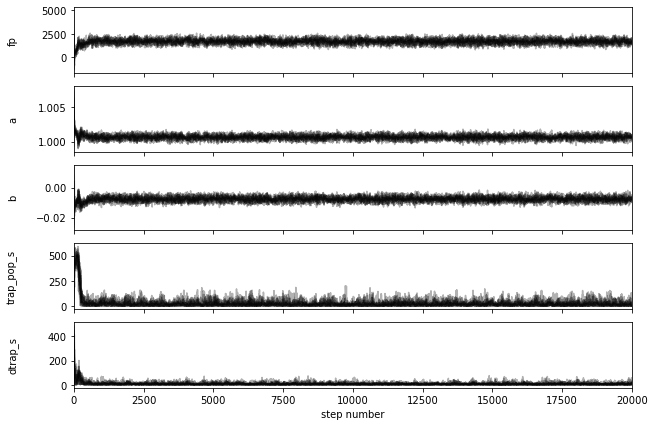

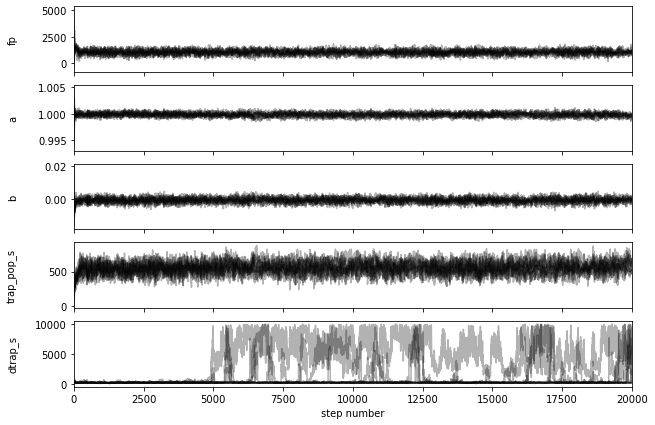

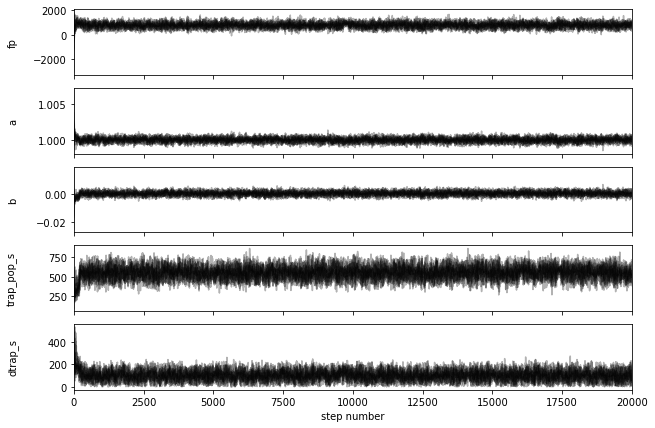

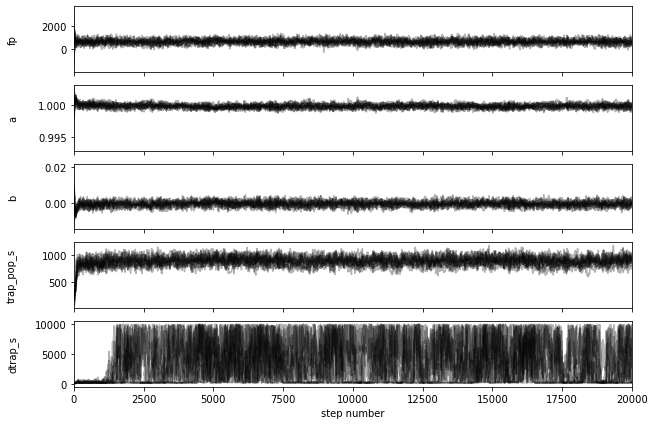

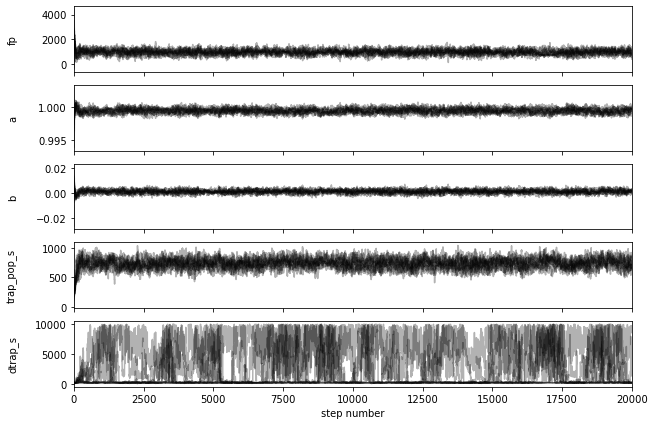

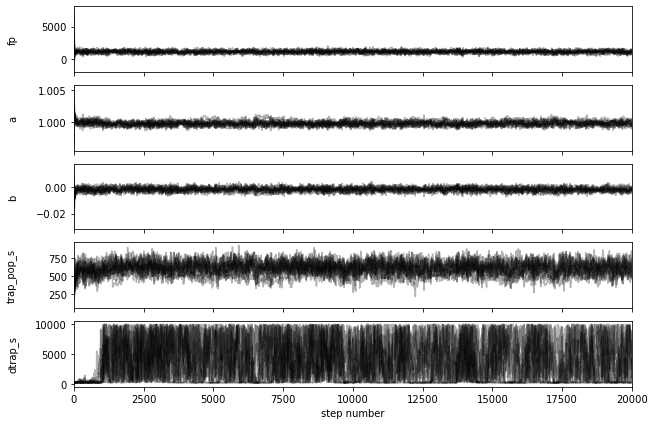

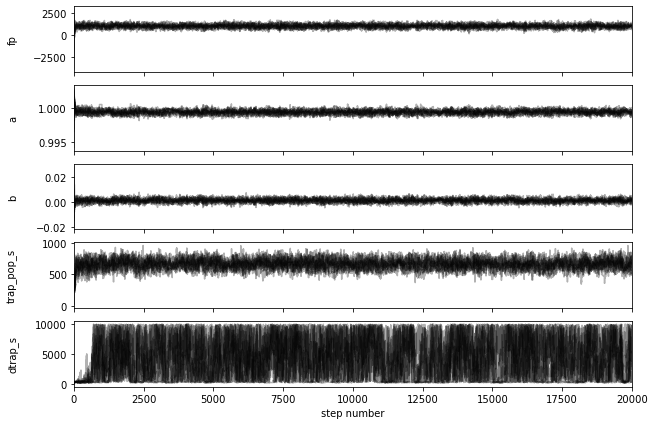

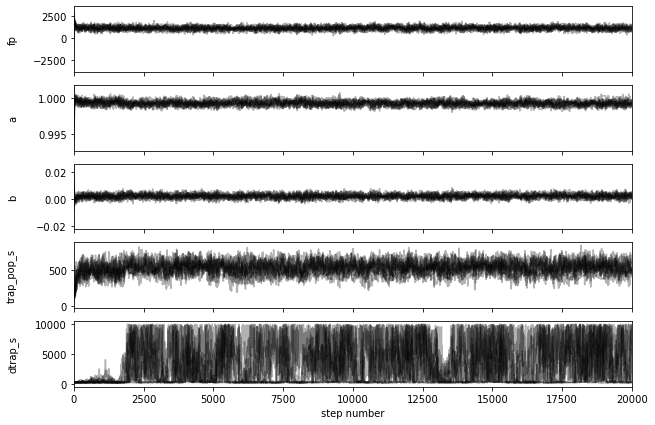

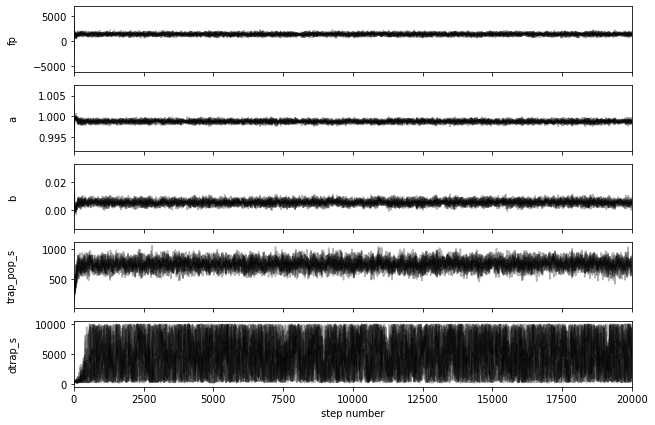

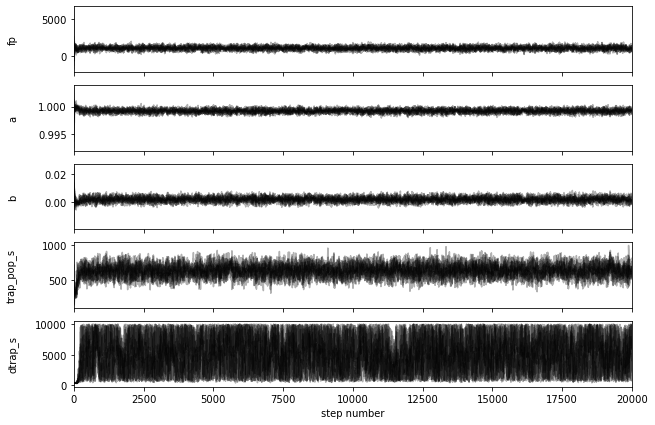

In [132]:
import emcee
start = time.time()
sampler_3 = MCMC(spec_v3,eclipse_model_RECTE,v3_wavebin_channels,20000,nbins=10,recalculate=False,showPlot=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

In [126]:
import emcee
start = time.time()
sampler_4 = MCMC(spec_v4,eclipse_model_RECTE,v4_wavebin_channels,20000,nbins=10,recalculate=False,showPlot=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:36:25<00:00,  1.34s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:39:07<00:00,  1.36s/it]  


Solution_x took 0.0 seconds
found13000
running13000


100%|██████████| 7000/7000 [2:39:44<00:00,  1.37s/it]  


Solution_x took 0.0 seconds
found13000
running13000


 28%|██▊       | 1983/7000 [45:03<1:53:58,  1.36s/it]Process ForkPoolWorker-1688:


emcee: Exception while calling your likelihood function:

Process ForkPoolWorker-1686:
Process ForkPoolWorker-1678:
Process ForkPoolWorker-1684:
Process ForkPoolWorker-1675:
Process ForkPoolWorker-1685:
Process ForkPoolWorker-1679:
Process ForkPoolWorker-1682:
Process ForkPoolWorker-1677:
Process ForkPoolWorker-1680:
Process ForkPoolWorker-1683:
Process ForkPoolWorker-1676:


Process ForkPoolWorker-1673:
Process ForkPoolWorker-1687:
Process ForkPoolWorker-1681:


  params: [ 6.50529899e+02  1.00029535e+00 -5.81522129e-04  2.22586511e+02
  2.27909752e+02]


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


  args:

Traceback (most recent call last):


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/mu

(<Quantity [2455963.25065665, 2455963.25203397, 2455963.25341128,
           2455963.2547886 , 2455963.25616591, 2455963.25754323,
           2455963.25892054, 2455963.26029786, 2455963.26167517,
           2455963.26305248, 2455963.2644298 , 2455963.26580711,
           2455963.26718443, 2455963.26856174, 2455963.26993906,
           2455963.27131637, 2455963.27269369, 2455963.274071  ,
           2455963.27544832, 2455963.27682563, 2455963.27820295,
           2455963.27958026, 2455963.28095758, 2455963.31460341,
           2455963.31598073, 2455963.31735804, 2455963.31873536,
           2455963.32011267, 2455963.32148999, 2455963.3228673 ,
           2455963.32424461, 2455963.32562193, 2455963.32699924,
           2455963.32837656, 2455963.32975387, 2455963.33113119,
           2455963.3325085 , 2455963.33388582, 2455963.33526313,
           2455963.33664045, 2455963.33801776, 2455963.33939508,
           2455963.34077239, 2455963.34214971, 2455963.34352702,
           2455963.34490

  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/kglidic/miniconda3/envs/astroconda

  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/mul

  kwargs:

  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()


KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt


{}

  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)


  File "/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)


  exception:

KeyboardInterrupt



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcea1d0fd08> (for post_execute):


KeyboardInterrupt: 

# Transit & Eclipse Spectrums

In [ ]:
#wavebins values 
xc0_v1 = 75.36  
yc0_v1 = 71.57

xc0_v2 = 73.593  
yc0_v2 = 73.2098 

xc0_v3 = 75.0211
yc0_v3= 71.4784

xc0_v4=75.3891
yc0_v4=71.4633

#calibrations 
table_noise_v1=spec_v1.print_noise_wavebin(nbins=10)
table_noise_v2=spec_v2.print_noise_wavebin(nbins=10)
table_noise_v3=spec_v3.print_noise_wavebin(nbins=10)
table_noise_v4=spec_v4.print_noise_wavebin(nbins=10)

dismid_v1 = table_noise_v1['Disp Mid']
dismid_v2 = table_noise_v2['Disp Mid']
dismid_v3 = table_noise_v3['Disp Mid']
dismid_v4 = table_noise_v4['Disp Mid']

wavebins_v1 = spec_v1.wavecal(dismid_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_v2 = spec_v2.wavecal(dismid_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_v3 = spec_v3.wavecal(dismid_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_v4 = spec_v4.wavecal(dismid_v4,waveCalMethod = 'wfc3Dispersion')

In [ ]:
#start and end disp to wavelength
disst_v1 = table_noise_v1['Disp St']
disst_v2 = table_noise_v2['Disp St']
disst_v3 = table_noise_v3['Disp St']
disst_v4 = table_noise_v4['Disp St']

disend_v1 = table_noise_v1['Disp End']
disend_v2 = table_noise_v2['Disp End']
disend_v3 = table_noise_v3['Disp End']
disend_v4 = table_noise_v4['Disp End']

wavebins_st_v1 = spec_v1.wavecal(disst_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v2 = spec_v2.wavecal(disst_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v3 = spec_v3.wavecal(disst_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v4 = spec_v4.wavecal(disst_v4,waveCalMethod = 'wfc3Dispersion')

wavebins_end_v1 = spec_v1.wavecal(disend_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v2 = spec_v2.wavecal(disend_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v3 = spec_v3.wavecal(disend_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v4 = spec_v4.wavecal(disend_v4,waveCalMethod = 'wfc3Dispersion')

#print(wavebins_v1)
#print(wavebins_v4)

In [ ]:
#without RECTE corrections
yerr_v1=v1_wavebins[1]
yerr_v2=v2_wavebins[1]
yerr_v3=v3_wavebins[1]
yerr_v4=v4_wavebins[1]

popt_v1=v1_wavebins[0]
popt_v2=v2_wavebins[0]
popt_v3=v3_wavebins[0]
popt_v4=v4_wavebins[0]

#with RECTE corrections

yerr_v1_RECTE_i = v1_wavebin_channels[1]
yerr_v1_RECTE = [item[0] for item in yerr_v1_RECTE_i]

yerr_v2_RECTE_i = v2_wavebin_channels[1]
yerr_v2_RECTE = [item[0] for item in yerr_v2_RECTE_i]

yerr_v3_RECTE_i = v3_wavebin_channels[1]
yerr_v3_RECTE = [item[0] for item in yerr_v3_RECTE_i]

yerr_v4_RECTE_i = v4_wavebin_channels[1]
yerr_v4_RECTE = [item[0] for item in yerr_v4_RECTE_i]

popt_v1_RECTE_i = v1_wavebin_channels[0]
popt_v1_RECTE = [item[0] for item in popt_v1_RECTE_i]

popt_v2_RECTE_i = v2_wavebin_channels[0]
popt_v2_RECTE = [item[0] for item in popt_v2_RECTE_i]

popt_v3_RECTE_i = v3_wavebin_channels[0]
popt_v3_RECTE = [item[0] for item in popt_v3_RECTE_i]

popt_v4_RECTE_i = v4_wavebin_channels[0]
popt_v4_RECTE = [item[0] for item in popt_v4_RECTE_i]

## Secondary Eclipses

In [ ]:
#without RECTE corrections
fig, (ax, ax2) = plt.subplots(2,sharex=True,figsize=(10,10))

ax.errorbar(wavebins_v2,popt_v2,yerr=yerr_v2,label='visit 2', fmt='--o')
ax.errorbar(wavebins_v3,popt_v3,yerr=yerr_v3,label='visit 3', fmt='--o')
ax.errorbar(wavebins_v4,popt_v4,yerr=yerr_v4,label='visit 4', fmt='--o')
ax.set_title('Eclipse Spectrum w/o RECTE Optimization')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')

#with RECTE corrections

ax2.errorbar(wavebins_v1,popt_v2_RECTE,yerr=yerr_v2_RECTE,label='visit 2', fmt='--o')
ax2.errorbar(wavebins_v2,popt_v3_RECTE,yerr=yerr_v3_RECTE,label='visit 3', fmt='--o')
ax2.errorbar(wavebins_v3,popt_v4_RECTE,yerr=yerr_v4_RECTE,label='visit 4', fmt='--o')
ax2.set_title('Eclipse Spectrum with RECTE Optimization')
ax2.legend(loc ='upper left') 
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Flux Ratio')

fig.savefig('saved_figures/new_eclipse_spectrums.pdf')

In [ ]:
# eclipse average without RECTE corrections
yerr = [(g+h+k) / 3 for g, h,k in zip( yerr_v2,yerr_v3,yerr_v4)]
popt_fp = [(g+h+k) / 3 for g, h,k in zip( popt_v2,popt_v3,popt_v4)]

#eclispe average with RECTE corrections
yerr_RECTE = [(g+h+k) / 3 for g, h,k in zip(yerr_v2_RECTE,yerr_v3_RECTE,yerr_v4_RECTE)]
popt_fp_RECTE = [(g+h+k) / 3 for g, h,k in zip( popt_v2_RECTE,popt_v3_RECTE,popt_v4_RECTE)]

#averaging the wavebins
wavebins_avg = [(g+h+k)/3 for g,h,k in zip(wavebins_v2,wavebins_v3,wavebins_v4)]

In [ ]:
#without RECTE corrections
fig, (ax, ax2) = plt.subplots(2,sharex=True,figsize=(10,10))

ax.errorbar(wavebins_avg,popt_fp,yerr=yerr,label='Average for Visits (2,3 & 4)', fmt='--o', alpha =0.5)
ax.errorbar(wavebins_v2,popt_v2,yerr=yerr_v2,label='visit 2', fmt='--o', color='grey',alpha=0.30)
ax.errorbar(wavebins_v3,popt_v3,yerr=yerr_v3,label='visit 3', fmt='--o',color='grey',alpha=0.30)
ax.errorbar(wavebins_v4,popt_v4,yerr=yerr_v4,label='visit 4', fmt='--o',color='grey',alpha=0.30)
ax.set_title('Eclipse Spectrum w/o RECTE Optimization')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')

#with RECTE corrections

ax2.errorbar(wavebins_avg,popt_fp_RECTE,yerr=yerr_RECTE,label='Average for Visits (2,3 & 4)', fmt='--o',alpha=0.5)
ax2.errorbar(wavebins_v2,popt_v2_RECTE,yerr=yerr_v2_RECTE,label='visit 2', fmt='--o', color='grey',alpha=0.30)
ax2.errorbar(wavebins_v3,popt_v3_RECTE,yerr=yerr_v3_RECTE,label='visit 3', fmt='--o', color='grey',alpha=0.30)
ax2.errorbar(wavebins_v4,popt_v4_RECTE,yerr=yerr_v4_RECTE,label='visit 4', fmt='--o', color='grey',alpha=0.30)
ax2.set_title('Eclipse Spectrum with RECTE Optimization')
ax2.legend(loc ='upper left') 
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Flux Ratio')

fig.savefig('saved_figures/new_Average_Eclipse_Spectrum.pdf')

### Mike Line Theoretical Models

In [ ]:
redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
spitzer_wavelengths=[3.6,4.5] #in microns
spitzer_eclipse_depths=[(0.415/100)*1000000, (0.482/100)*1000000] #in ppm
spitzer_eclipse_depths_errors=[(0.042/100)*1000000, (0.042/100)*1000000] #in ppm

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(redist_266['#Wavelength[um]'],redist_266['Fp/Fstar[ppm]'],label='COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec',c='cyan')
ax.plot(redist_2['#Wavelength[um]'],redist_2['Fp/Fstar[ppm]'],label='COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec',c='yellow')
ax.plot(redist_1['#Wavelength[um]'],redist_1['Fp/Fstar[ppm]'],label='COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec',c='darkred')
ax.errorbar(wavebins_avg,popt_fp,yerr=yerr,label='Average for Hubble Visits (2,3 & 4) without RECTE Optimization', fmt='o',ms=10,mfc='none')
ax.errorbar(wavebins_avg,popt_fp_RECTE,yerr=yerr_RECTE,label='Average for Hubble Visits (2,3 & 4) with RECTE Optimization', fmt='o',ms=3)
ax.errorbar(spitzer_wavelengths,spitzer_eclipse_depths,yerr=spitzer_eclipse_depths_errors,fmt='o',label='Spitzer Data')


ax.set_xlim(0.8,5)
ax.set_ylim(0,6000)

#ax.set_xlim(0.8,2.0)
#ax.set_ylim(0,1400)
ax.legend(loc='upper left')
ax.set_title('Mike Line CoRoT-1b Theoretical Secondary Eclipse Spectra overlayed with Spitzer & Hubble Data')
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio [ppm]')

fig.savefig('saved_figures/new_Mike_Line_CoRoT-1b_Theoretical_Secondary_Eclipse_Spectra_Overlayed_with_Spitzer_&_Hubble_Data.pdf')

## Primary Transit

In [ ]:
ranjan_rp = [0.1380, 0.1410, 0.1384, 0.1410, 0.1389, 0.1410, 0.1396, 0.1370, 0.1307, 0.1319]
ranjan_wavelength_st =[1.118,1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561]
ranjan_wavelength_end=[1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561,1.619]

ranjan_avg_wavelength=[(g + h) / 2 for g, h in zip(ranjan_wavelength_st, ranjan_wavelength_end)]
#ranjan_avg_wavelength

In [ ]:
fig, (ax, ax2) = plt.subplots(2,sharex=False,figsize=(10,10))

ax.errorbar(wavebins_v1,popt_v1,yerr=yerr_v1,label='Visit 1', fmt='--o')
ax.set_title('Transit Spectrum w/o RECTE Optimization')
#ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Radius Ratio')
ax.plot(ranjan_avg_wavelength,ranjan_rp,'--o',label='Ranjan') #put in ranjan wavelengths
ax.legend(loc ='upper left') 


ax2.errorbar(wavebins_v1,popt_v1_RECTE,yerr=yerr_v1_RECTE,label='Visit 1', fmt='--o')
ax2.plot(ranjan_avg_wavelength,ranjan_rp,'--o',label='Ranjan') #put in ranjan wavelengths
ax2.legend(loc ='upper left')
ax2.set_title('Transit Spectrum with RECTE Optimization')
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Radius Ratio')

fig.savefig('saved_figures/new_ranjan_transit_spectrum_comparison.pdf')


### Mike Line Theoretical Model

In [ ]:
redist_266_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")
redist_1_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")
redist_2_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")

squared_popt_v1 = [(number ** 2)*100 for number in popt_v1]
squared_popt_v1_RECTE = [(number ** 2)*100 for number in popt_v1_RECTE]

modified_yerr_v1 = []
modified_yerr_v1_RECTE=[]

#this code multiplies Rp/Rstar times the error times 2
for num1, num2 in zip(popt_v1, yerr_v1):
    modified_yerr_v1.append(2*(num1 * num2)*100)
for num1, num2 in zip(popt_v1_RECTE, yerr_v1_RECTE):
    modified_yerr_v1_RECTE.append(2*(num1 * num2)*100)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(redist_266_trans['#Wavelength[um]'],redist_266_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_trans_spec',c='cyan')
ax.plot(redist_2_trans['#Wavelength[um]'],redist_2_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_trans_spec',c='yellow')
ax.plot(redist_1_trans['#Wavelength[um]'],redist_1_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_trans_spec',c='darkred')
ax.errorbar(wavebins_v1,squared_popt_v1,yerr=modified_yerr_v1,label='Primary Transit Hubble Data without RECTE Optimization', fmt='o',ms=10,mfc='none')
ax.errorbar(wavebins_v1,squared_popt_v1_RECTE,yerr=modified_yerr_v1_RECTE,label='Primary Transit Hubble Data with RECTE Optimization', fmt='o',ms=3)

#ax.plot(wavebins_v1,squared_popt_v1,label='Primary Transit without RECTE Corrections')
#ax.plot(wavebins_v1,squared_popt_v1_RECTE,label='Primary Transit with RECTE Corrections')


ax.set_xlim(0.8,2.0)
ax.set_ylim(1.78,2.2)
ax.legend(loc='upper left')
ax.set_title('Mike Line CoRoT-1b Theoretical Primary Tranist Spectra with Hubble Data')
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Transit Depth [%]')
fig.savefig('saved_figures/new_Mike_Line_CoRoT-1b_Theoretical_Primary_Tranist_Spectra_with_Hubble_Data.pdf')

In [ ]:
def blackbody_lam(x, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    x = 1e-6 *x # convert from microns to metres
    return 2*h*c**2 / (x**5 * (np.exp(h*c / (x*k*T)) - 1)) #returns intensity(or flux)


In [ ]:
def Planet_to_Star_Flux_Ratio(x,T_planet,T_star=5907.6665,R_planet=rp, R_star=Rstar):
    #x in microns, temperature in Kelvins,Radii in same units 
    flux_planet = blackbody_lam(x,T_planet)*(np.pi)*(R_planet)**2
    flux_star = blackbody_lam(x,T_star)*(np.pi)*(R_star)**2
    planet_to_star_flux_ratio = ((flux_planet/flux_star).si.value)*1e6 #ppm

    return planet_to_star_flux_ratio

In [ ]:
real_planet_to_star_flux_ratio=popt_fp_RECTE
median_error=[np.median(yerr_RECTE)]*len(popt_fp_RECTE)
optimized_temp, error_optimized_temp = curve_fit(Planet_to_Star_Flux_Ratio, wavebins_v1, real_planet_to_star_flux_ratio,p0=1000)#,sigma=median_error)

planet_to_star_flux_ratio = Planet_to_Star_Flux_Ratio(wavebins_v1,optimized_temp)

#plotting
fig, ax = plt.subplots(figsize=(10,10)) 

#real data
ax.errorbar(wavebins_v1,popt_fp_RECTE,yerr=np.median(yerr_RECTE),label='Average for Visits (2,3 & 4)', fmt='--o')

#blackbody modeled data
ax.plot(wavebins_v1,planet_to_star_flux_ratio,'--o',label='Optimized Blackbody Model')

#ax.set_title('Eclipse Spectrum with RECTE Correction')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')
ax.set_title('Average Eclipse Spectrum BlackBody Model')
fig.savefig('saved_figures/new_Blackbody_model.pdf')


In [ ]:
optimized_temp

# Obtaining Header Information

In [ ]:
#the visit that happened first in the time line January 17th 
head_v1_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit1/ibh717hrq_flt.fits')
print(head_v1_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v1_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v1_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v1_start['PATTSTEP']) #position number of this point in the pattern

In [ ]:
head_v2_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit2/ibh719jlq_flt.fits')
print(head_v2_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v2_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v2_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v2_start['PATTSTEP']) #position number of this point in the pattern

In [ ]:
head_v3_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit3/ibh720kdq_flt.fits')
print(head_v3_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v3_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v3_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v3_start['PATTSTEP']) #position number of this point in the pattern

In [ ]:
head_v4_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit4/ibh721qtq_flt.fits')
print(head_v4_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v4_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v4_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v4_start['PATTSTEP']) #position number of this point in the pattern